ANN

1~5번까지 CNN 내용 같음

In [73]:
import glob
base_path = './xray_classification_pneumonia/Dataset_compressed/train'
file_path = list(glob.glob(base_path + "/*/*.*"))
pneumonia = list(glob.glob(base_path+"/PNEUMONIA/*.*"))
normal = list(glob.glob(base_path+"/NORMAL/*.*"))

In [74]:
label_name = {
    0: 'normal',
    1: 'pneumonia'
}

In [75]:
len(pneumonia), len(normal)

(3875, 1341)

In [76]:
import matplotlib.pyplot as plt
import os
test = os.path.dirname(file_path[0])
print(test)
class_name = os.path.split(os.path.dirname(test))
print(class_name)

./xray_classification_pneumonia/Dataset_compressed/train\NORMAL
('./xray_classification_pneumonia/Dataset_compressed', 'train')


In [77]:
labels = []
for fp in file_path:
    tmp = os.path.dirname(fp)
    class_name = os.path.split(tmp)
    if class_name[1] == "PNEUMONIA":
        labels.append(1)
    else:
        labels.append(0)

In [78]:
import numpy as np
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2

img_width = 60 # size 고정
img_height = 60

dataset = np.ndarray(shape=(len(file_path), img_height*img_width), dtype=np.float32)  # array로 바꿈
i=0
for _file in file_path:
    img = cv2.imread(_file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_width, img_height))
    
    dataset[i] = img_resized.flatten()
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


CNN 내용 여기까지

In [79]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [80]:
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)

In [81]:
len(x_train), len(x_test), len(y_train), len(y_test)

(4172, 1044, 4172, 1044)

모델 생성

In [82]:
y_train, y_test = map(lambda x: to_categorical(x), [y_train, y_test])

In [83]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [84]:
def build():
    model = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = (3600,)))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    return model

model = build()
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │       360,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,252 (1.39 MB)

 Trainable params: 365,252 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.predict(dataset)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


array([[1.0000000e+00, 3.3154579e-25],
       [1.2701756e-22, 1.0000000e+00],
       [1.7516836e-23, 1.0000000e+00],
       ...,
       [1.0000000e+00, 5.1171028e-21],
       [9.3778800e-38, 1.0000000e+00],
       [1.4685322e-28, 1.0000000e+00]], dtype=float32)

adam 학습

In [86]:
model_adam = build()
model_adam.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics=['accuracy'])
history = model_adam.fit(
    x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, epochs = 20
)

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6775 - loss: 105.2141 - val_accuracy: 0.7902 - val_loss: 8.3333
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 3.7176 - val_accuracy: 0.8429 - val_loss: 3.8335
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8885 - loss: 2.2383 - val_accuracy: 0.7337 - val_loss: 14.9137
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 3.5098 - val_accuracy: 0.9061 - val_loss: 1.8336
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9198 - loss: 1.4693 - val_accuracy: 0.8525 - val_loss: 3.0363
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9135 - loss: 1.7105 - val_accuracy: 0.8669 - val_loss: 3.5972
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 2.2406 - val_accuracy: 0.8180 - val_loss: 4.5408
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9148 - loss: 1.7649 - val_accuracy: 0.9454 - val_lo

예측

In [87]:
import matplotlib.pyplot as plt
import numpy as np
prediction = model_adam.predict(x_test)

predicted_class= np.argmax(prediction, axis= 1)
True_classes = np.argmax(y_test, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


정확도 계산

In [88]:
accuracy = np.mean(predicted_class == True_classes)
print(f'accuracy: {accuracy * 100:.2f}%')

accuracy: 87.84%


시각화

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

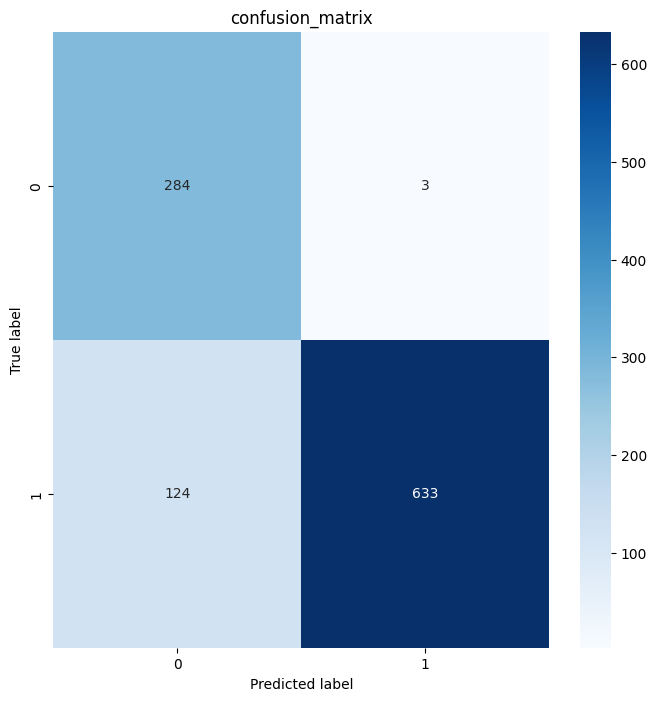

In [90]:
conf_matrix = confusion_matrix(True_classes, predicted_class)
plt.figure(figsize=(8,8))

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap= 'Blues')
plt.title('confusion_matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

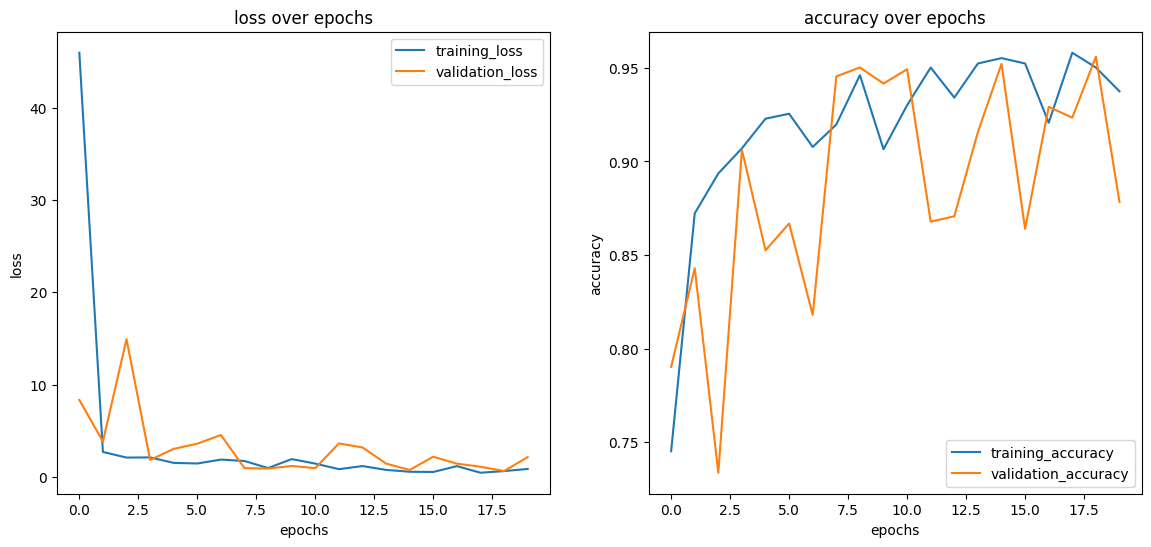

In [91]:
# train, val 시각화 - loss로 그래프 그림
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('loss over epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.title('accuracy over epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

CNN

In [92]:
# ANN의 1번에서 5번까지 같은 내용

In [93]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
image_width = 60
image_height = 60
channels = 3
dataset = np.ndarray(shape=(len(file_path), image_height, image_width, channels),dtype=np.float32)
i=0
for _file in file_path:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    x = img_to_array(img)
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


데이터 시각화

In [94]:
import cv2

im0 = cv2.imread(pneumonia[67])
im1 = cv2.imread(normal[67])

im0.shape, im1.shape

((60, 60, 3), (60, 60, 3))

(-0.5, 59.5, 59.5, -0.5)

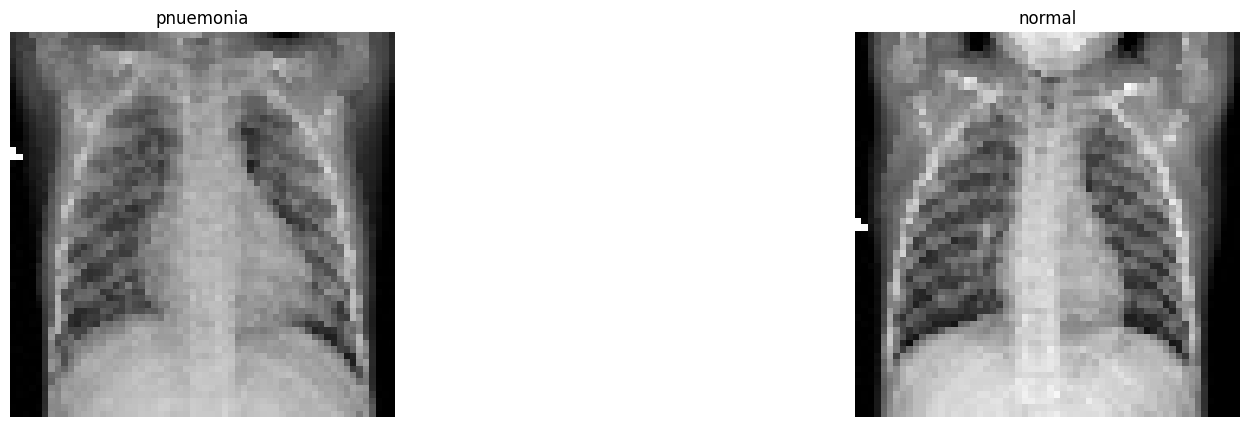

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('pnuemonia')
plt.imshow(im0)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('normal')
plt.imshow(im1)
plt.axis('off')

In [96]:
# Train, val test detaset

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train1, x_test1, y_train1,y_test1 = train_test_split(dataset, labels, test_size=0.2, random_state=321)
x_val1, x_test1, y_val1, y_test1 = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)
y_train1, y_test1, y_val1 = to_categorical(y_train1), to_categorical(y_test1), to_categorical(y_val1)

# preprocess 전처리 - normalization->/255

x_train1 = x_train1.astype('float32')/255.
x_test1 = x_test1.astype('float32')/255.
x_val1 = x_val1.astype('float32')/255.

In [97]:
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape, x_val1.shape, y_val1.shape

((4172, 60, 60, 3),
 (4172, 2),
 (522, 60, 60, 3),
 (522, 2),
 (522, 60, 60, 3),
 (522, 2))

CNN 생성

In [98]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

In [99]:
# Vanilla CNN -> 기본 틀의 CNN

# Vanilla CNN
def build():
    CNN = Sequential()
    CNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(60, 60, 3)))
    CNN.add(MaxPooling2D(pool_size=(2, 2)))
    CNN.add(Conv2D(64, (3, 3), padding='same', activation='relu',))
    CNN.add(MaxPooling2D(pool_size=(2, 2)))
    CNN.add(Flatten())
    CNN.add(Dense(1000, activation='relu'))
    CNN.add(Dense(500, activation='relu'))
    CNN.add(Dense(2, activation='softmax'))
    return CNN


In [100]:
# metric function
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (possible_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [101]:
BATCH_SIZE = 32

학습

In [102]:
CNN_Adam = build()

opt = optimizers.Adam(learning_rate=0.001)
CNN_Adam.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 
               recall_m, 
               precision_m, 
               f1_m]    
)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
epochs = 5
history = CNN_Adam.fit(
    x_train1,
    y_train1,
    validation_data = (x_val1,y_val1),
    epochs=epochs,
    batch_size = BATCH_SIZE
)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.8282 - f1_m: 0.8282 - loss: 0.4399 - precision_m: 0.8282 - recall_m: 0.8282 - val_accuracy: 0.9598 - val_f1_m: 0.9614 - val_loss: 0.1115 - val_precision_m: 0.9614 - val_recall_m: 0.9614
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9686 - f1_m: 0.9686 - loss: 0.0859 - precision_m: 0.9686 - recall_m: 0.9686 - val_accuracy: 0.9598 - val_f1_m: 0.9614 - val_loss: 0.1191 - val_precision_m: 0.9614 - val_recall_m: 0.9614
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9592 - f1_m: 0.9592 - loss: 0.1111 - precision_m: 0.9592 - recall_m: 0.9592 - val_accuracy: 0.9636 - val_f1_m: 0.9651 - val_loss: 0.1019 - val_precision_m: 0.9651 - val_recall_m: 0.9651
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9784 - f1_m: 0.9784 - loss: 0.0595 - precision_m: 0.9784 - recall_m: 0.9784 - val_accuracy: 0.9693 - val_f1_m: 0.9706 - val_loss: 0.0866 - val_precision_m: 0.9706 - val_recal

테스트

In [104]:
score = CNN_Adam.evaluate(x_test1, y_test1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9759 - f1_m: 0.9760 - loss: 0.0652 - precision_m: 0.9760 - recall_m: 0.9760


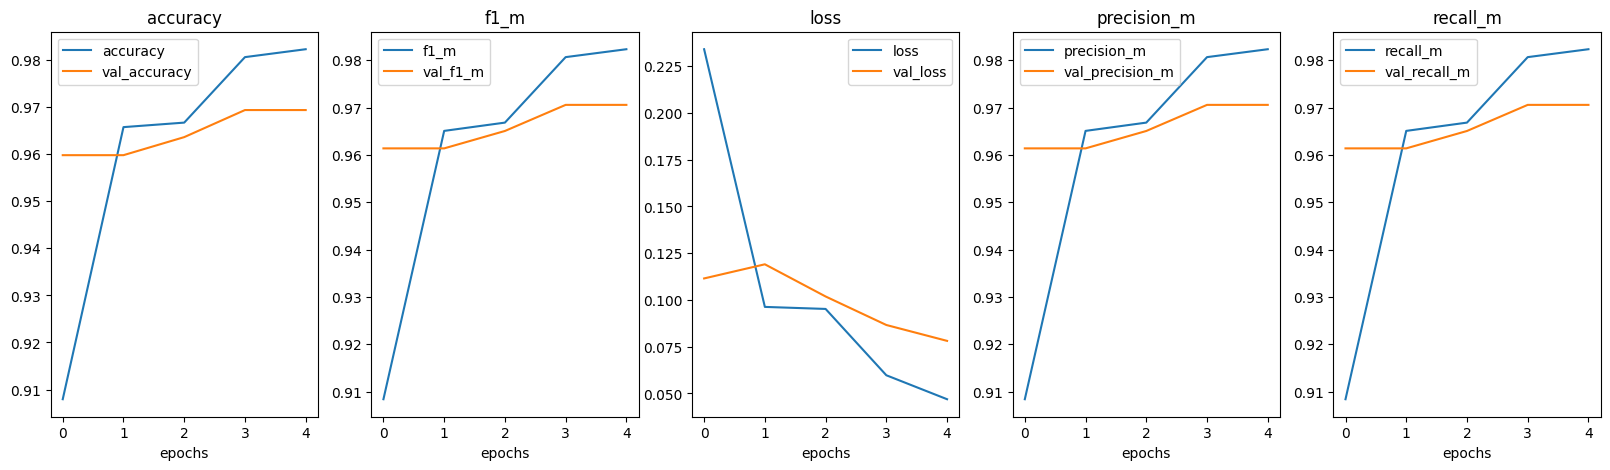

In [105]:
# 시각화
plt.figure(figsize=(20,5))
for i, key in enumerate(list(history.history.keys())[:5]):
    plt.subplot(1,5,i+1)
    plt.title(key)
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('epochs')
    plt.legend([key,'val_'+key])
plt.show()

예측

In [106]:
y_pred = CNN_Adam.predict(x_test1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [107]:
y_pred_argmax = np.argmax(np.array(y_pred), axis=1)
y_pred_argmax

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [108]:
# 예측결과 시각화
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test1.argmax(-1), y_pred_argmax))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       128
           1       0.98      0.98      0.98       394

    accuracy                           0.97       522
   macro avg       0.97      0.96      0.96       522
weighted avg       0.97      0.97      0.97       522



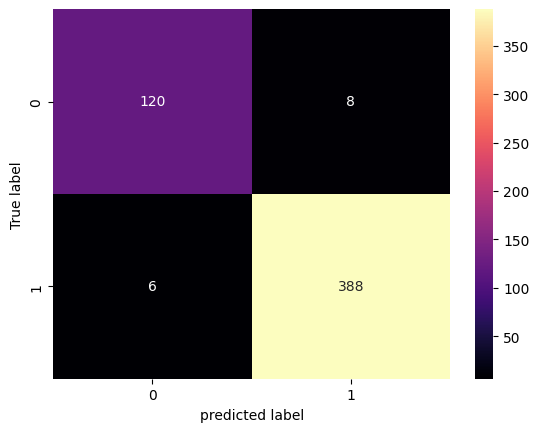

In [109]:
import seaborn as sns
heatmap = sns.heatmap(confusion_matrix(y_test1.argmax(-1),y_pred_argmax), annot=True, fmt='.3g',xticklabels=['0','1'],yticklabels=['0','1'], cmap = 'magma')
heatmap.set_xlabel('predicted label')
heatmap.set_ylabel('True label')
plt.show()

Inference

In [110]:
# inference 이미지 9개의 랜덤 추출
idx = np.random.randint(0,len(x_test1),9)

In [111]:
import matplotlib.pyplot as plt
target_x, target_y = x_test1[idx], y_test[idx]
predictions = CNN_Adam.predict(target_x)
predictions = predictions.argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


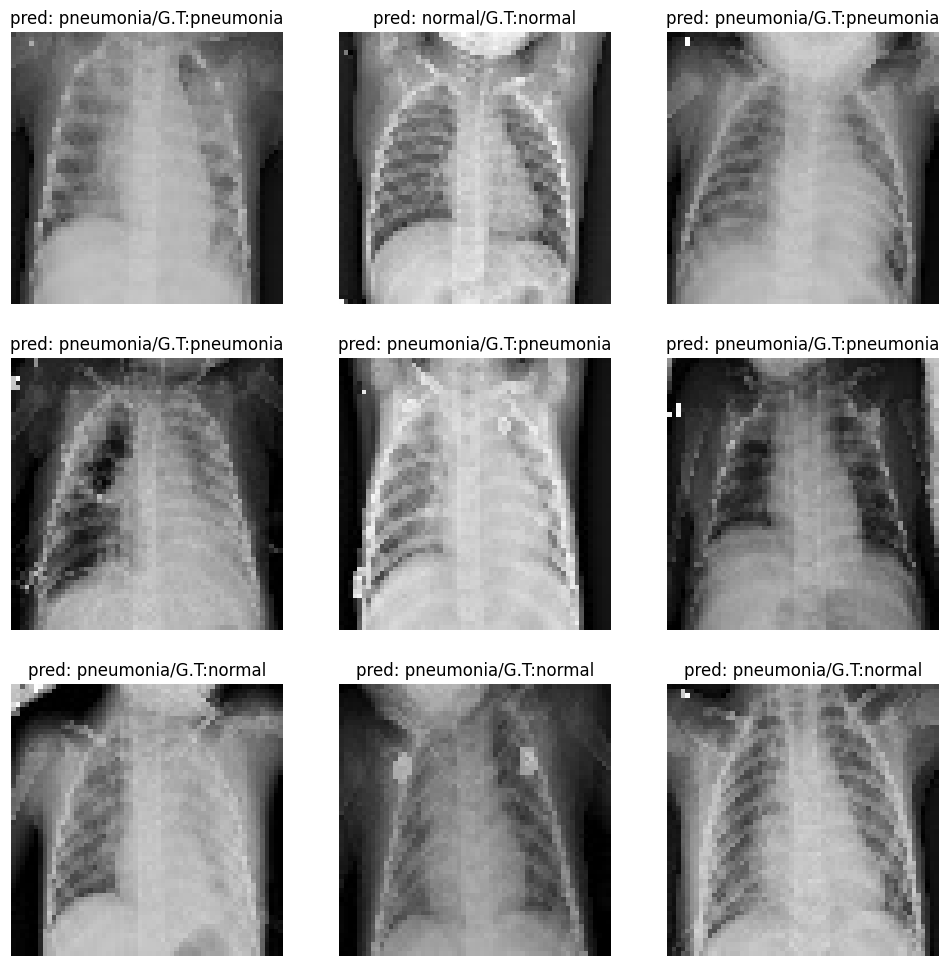

In [112]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    pred = label_name[predictions[i]]
    gth = label_name[y_test[i].argmax()]
    
    plt.title(f'pred: {pred}/G.T:{gth}')
    plt.imshow(target_x[i])
    plt.axis('off')
    

plt.show()

In [2]:
import torch
import torchvision